# **Part A**

**Demonstrate word stemming using Regular Expression, Porter Stemmer and Lancaster Stemmer and report the output**

In [ ]:
import re

def stem_word(word):
    # Define regex pattern for common suffixes
    pattern = r'(.*?)(ly|es|s|y|ing)?$'

    # Apply regex substitution
    stem, suffix = re.match(pattern, word).groups()

    return stem

# Sample paragraph
paragraph = "Textual information in the world can be broadly categorized into two main types: facts and opinions. Facts are objective expressions about entities, events, and their properties. Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties."

# Split the paragraph into words
words = re.findall(r'\b\w+\b', paragraph)

# Stem each word and print the results
for word in words:
    print(word + " -> " + stem_word(word))

Textual -> Textual
information -> information
in -> in
the -> the
world -> world
can -> can
be -> be
broadly -> broad
categorized -> categorized
into -> into
two -> two
main -> main
types -> typ
facts -> fact
and -> and
opinions -> opinion
Facts -> Fact
are -> are
objective -> objective
expressions -> expression
about -> about
entities -> entiti
events -> event
and -> and
their -> their
properties -> properti
Opinions -> Opinion
are -> are
usually -> usual
subjective -> subjective
expressions -> expression
that -> that
describe -> describe
people -> people
s -> 
sentiments -> sentiment
appraisals -> appraisal
or -> or
feelings -> feeling
toward -> toward
entities -> entiti
events -> event
and -> and
their -> their
properties -> properti


In [ ]:
from nltk.stem import PorterStemmer
import re

# Create a Porter Stemmer instance
porter_stemmer = PorterStemmer()

# Sample paragraph
paragraph = "Textual information in the world can be broadly categorized into two main types: facts and opinions. Facts are objective expressions about entities, events, and their properties. Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties."

# Split the paragraph into words
words = re.findall(r'\b\w+\b', paragraph)

# Apply stemming to each word using Porter Stemmer
stemmed_words = [porter_stemmer.stem(word) for word in words]

# Print the results
print("Original words:", words)
print("Stemmed words with Porter Stemmer:", stemmed_words)

Original words: ['Textual', 'information', 'in', 'the', 'world', 'can', 'be', 'broadly', 'categorized', 'into', 'two', 'main', 'types', 'facts', 'and', 'opinions', 'Facts', 'are', 'objective', 'expressions', 'about', 'entities', 'events', 'and', 'their', 'properties', 'Opinions', 'are', 'usually', 'subjective', 'expressions', 'that', 'describe', 'people', 's', 'sentiments', 'appraisals', 'or', 'feelings', 'toward', 'entities', 'events', 'and', 'their', 'properties']
Stemmed words with Porter Stemmer: ['textual', 'inform', 'in', 'the', 'world', 'can', 'be', 'broadli', 'categor', 'into', 'two', 'main', 'type', 'fact', 'and', 'opinion', 'fact', 'are', 'object', 'express', 'about', 'entiti', 'event', 'and', 'their', 'properti', 'opinion', 'are', 'usual', 'subject', 'express', 'that', 'describ', 'peopl', 's', 'sentiment', 'apprais', 'or', 'feel', 'toward', 'entiti', 'event', 'and', 'their', 'properti']


In [ ]:
from nltk.stem import LancasterStemmer
import re

# Create a Lancaster Stemmer instance
stemmer = LancasterStemmer()

# Sample paragraph
paragraph = "Textual information in the world can be broadly categorized into two main types: facts and opinions. Facts are objective expressions about entities, events, and their properties. Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties."

# Split the paragraph into words
words = re.findall(r'\b\w+\b', paragraph)

# Apply Lancaster Stemmer to each word
stemmed_words = [stemmer.stem(word) for word in words]

# Print the results
print("Original words:", words)
print("Stemmed words with Lancaster Stemmer:", stemmed_words)

Original words: ['Textual', 'information', 'in', 'the', 'world', 'can', 'be', 'broadly', 'categorized', 'into', 'two', 'main', 'types', 'facts', 'and', 'opinions', 'Facts', 'are', 'objective', 'expressions', 'about', 'entities', 'events', 'and', 'their', 'properties', 'Opinions', 'are', 'usually', 'subjective', 'expressions', 'that', 'describe', 'people', 's', 'sentiments', 'appraisals', 'or', 'feelings', 'toward', 'entities', 'events', 'and', 'their', 'properties']
Stemmed words with Lancaster Stemmer: ['text', 'inform', 'in', 'the', 'world', 'can', 'be', 'broad', 'categ', 'into', 'two', 'main', 'typ', 'fact', 'and', 'opin', 'fact', 'ar', 'object', 'express', 'about', 'ent', 'ev', 'and', 'their', 'property', 'opin', 'ar', 'us', 'subject', 'express', 'that', 'describ', 'peopl', 's', 'senty', 'appra', 'or', 'feel', 'toward', 'ent', 'ev', 'and', 'their', 'property']


# **Train Model Part B**

# **1.0 Import Libraries and Dataset**

In [ ]:
# Import required module
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/cleaned_IMDB_Dataset.csv')
print(df.shape)

Mounted at /content/drive
(50000, 2)


# 2.0 **Preprocessing**

In [ ]:
# Convert string to float for review column
df.sentiment.replace("positive" , 1 , inplace = True)
df.sentiment.replace("negative" , 0 , inplace = True)
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter matteis love time money visually stunni...,1


# **3.0 Train Model**

In [ ]:
X = df['review']
y = df['sentiment']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
num_features = 1000
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = num_features)

X = vectorizer.fit_transform(X)
assert len(vectorizer.get_feature_names_out()) == num_features
X = X.toarray()
print(X.shape)

(50000, 1000)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100),
    'priors': [[0.2, 0.8], [0.9, 0.1]]
}

grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=3, scoring='accuracy', verbose=10 )
grid_search.fit(X, y)

# Get the best estimator
best_classifier = grid_search.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START priors=[0.5, 0.5], var_smoothing=1.0......................
[CV 1/3; 1/100] END priors=[0.5, 0.5], var_smoothing=1.0;, score=0.672 total time=   1.6s
[CV 2/3; 1/100] START priors=[0.5, 0.5], var_smoothing=1.0......................
[CV 2/3; 1/100] END priors=[0.5, 0.5], var_smoothing=1.0;, score=0.720 total time=   1.7s
[CV 3/3; 1/100] START priors=[0.5, 0.5], var_smoothing=1.0......................
[CV 3/3; 1/100] END priors=[0.5, 0.5], var_smoothing=1.0;, score=0.732 total time=   3.0s
[CV 1/3; 2/100] START priors=[0.5, 0.5], var_smoothing=0.8111308307896871.......
[CV 1/3; 2/100] END priors=[0.5, 0.5], var_smoothing=0.8111308307896871;, score=0.669 total time=   1.1s
[CV 2/3; 2/100] START priors=[0.5, 0.5], var_smoothing=0.8111308307896871.......
[CV 2/3; 2/100] END priors=[0.5, 0.5], var_smoothing=0.8111308307896871;, score=0.729 total time=   1.1s
[CV 3/3; 2/100] START priors=[0.5, 0.5], var_smoothi

In [ ]:
# Make predictions on the test set
y_pred_test = best_classifier.predict(X_test)
y_pred_train = best_classifier.predict(X_train)

In [ ]:
# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

print('Best Hyperparameters:', grid_search.best_params_)
print('ROC-AUC Score:', roc_auc)
print('Train Accuracy:', train_accuracy)
print(classification_report(y_train,y_pred_train))

print("\n---------------------------------------------------------------------\n")

print('Test Accuracy:', test_accuracy)
print(classification_report(y_test,y_pred_test))

print('# ------------------------------------------------ #')

Best Hyperparameters: {'priors': [0.5, 0.5], 'var_smoothing': 0.0012328467394420659}
ROC-AUC Score: 0.813561464511761
Train Accuracy: 0.8162
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     19965
           1       0.82      0.80      0.81     20035

    accuracy                           0.82     40000
   macro avg       0.82      0.82      0.82     40000
weighted avg       0.82      0.82      0.82     40000


---------------------------------------------------------------------

Test Accuracy: 0.8136
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      5035
           1       0.81      0.81      0.81      4965

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

# ------------------------------------------------ #


[learning_curve] Training set sizes: [ 3333  6666  9999 13333 16666 19999 23333 26666 29999 33333]


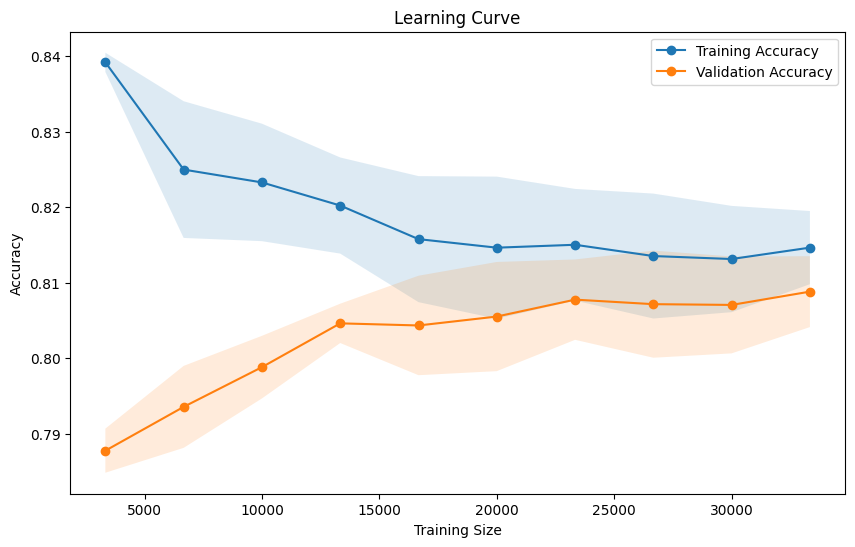

In [ ]:
# Define the GaussianNB classifier
classifier = GaussianNB(
    var_smoothing=best_classifier.var_smoothing,
    priors=best_classifier.priors
)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X, y, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), verbose=1
)

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

# Add labels and a legend
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Show the plot
plt.show()

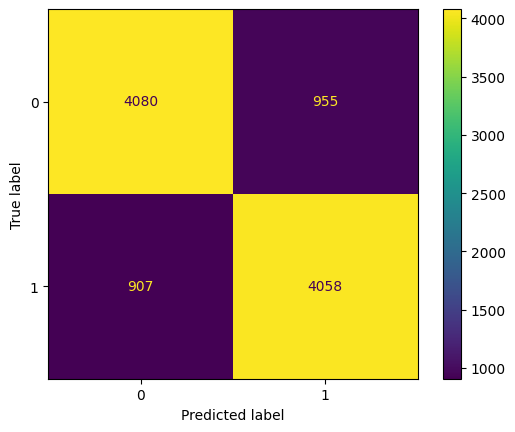

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()